# Loan Data - Classification Using Numerical Variables Only

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('df_new.csv', low_memory=False)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520.0,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,10,0,6760,16056.0,0.0,0.0
1,Fully Paid,3441.0,Short Term,734.0,4 years,Home Mortgage,42269.0,other,1106.04,26.3,17,0,6262,19149.0,0.0,0.0
2,Fully Paid,21029.0,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,5,0,20967,28335.0,0.0,0.0
3,Fully Paid,18743.0,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,9,0,22529,43915.0,0.0,0.0
4,Fully Paid,11731.0,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,12,0,17391,37081.0,0.0,0.0


In [3]:
df.dtypes

Loan Status                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Years in current job          object
Home Ownership                object
Annual Income                float64
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

## Logistic Regression using GridSearchCV cross-validation

In [4]:
# create X - matrix of independent vars and y - vector of dependent vars

In [5]:
X=df.drop(['Loan Status','Term', 'Years in current job','Home Ownership','Purpose'], axis=1)
y=df['Loan Status']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [7]:
# split into train and test data sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# create a grid for estimating a variety of models with meta parameter 'C' and penalties in l1 or l2 mode

In [10]:
c_space = np.logspace(-5, 8, 15)
param_grid={'C': c_space, 'penalty':['l2']} # [l1,'l2']
logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5);
logreg_cv.fit(X_train, y_train);

In [11]:
logreg_cv.best_params_

{'C': 1e-05, 'penalty': 'l2'}

In [12]:
logreg_cv.best_score_

0.6326561005087187

In [13]:
best_model = logreg_cv.best_estimator_

In [14]:
y_pred = best_model.predict(X_test)

In [15]:
y_pred

array(['Fully Paid', 'Fully Paid', 'Charged Off', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [16]:
y_pred_proba=best_model.predict_proba(X_test)

In [17]:
y_pred_proba[:5]

array([[0.39116069, 0.60883931],
       [0.45568817, 0.54431183],
       [0.58504384, 0.41495616],
       [0.03022643, 0.96977357],
       [0.19414064, 0.80585936]])

In [18]:
# wrestle data to create plots:
# here I create two subsets of probabilities, one for cases that were 'Fully Paid' and 
# correctly identified as such, and one for 'Charged Off' and correctly identified as such
pred_proba_df=pd.DataFrame(data=y_pred_proba, columns=['Charged Off','Fully Paid'])
pred_proba_df['True']=y_test.values

subset_1=pred_proba_df[pred_proba_df['True']=='Fully Paid']['Fully Paid']
subset_2=pred_proba_df[pred_proba_df['True']=='Charged Off']['Charged Off']

In [19]:
pred_proba_df.head()

,Charged Off,Fully Paid,True
0,0.391161,0.608839,Fully Paid
1,0.455688,0.544312,Charged Off
2,0.585044,0.414956,Charged Off
3,0.030226,0.969774,Fully Paid
4,0.194141,0.805859,Charged Off


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [21]:
# the graph shows distribution of correctly classified cases: 
# where "Charged Off" have very low porobability of the correct classification (grey peak on the left)
# i.e. the model works a lot better for Fully Paid than for 'Charged Off'

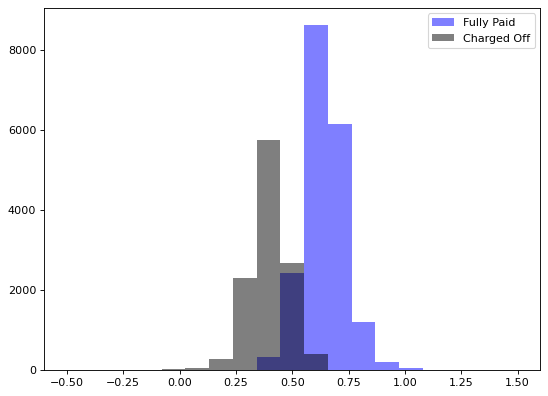

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
bins = np.linspace(-0.5, 1.5, 20)

plt.hist(subset_1, bins, color="b", alpha=0.5, label='Fully Paid')
plt.hist(subset_2, bins, color="k",alpha=0.5,label='Charged Off')
plt.legend(loc='upper right')
plt.show()

In [23]:
# confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
confusion_matrix(y_test, y_pred)

array([[ 1317, 10168],
       [ 1091, 17890]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred)) # the model works better for predicting 'Fully Paid' than for 'Charged Off'

              precision    recall  f1-score   support

 Charged Off       0.55      0.11      0.19     11485
  Fully Paid       0.64      0.94      0.76     18981

    accuracy                           0.63     30466
   macro avg       0.59      0.53      0.48     30466
weighted avg       0.60      0.63      0.55     30466



### Building a Receiver Operating Characteristic curve

#### It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = best_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

In [28]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# ROC AUC for the logistic regression model and for the no skill classifier that only predicts 0 for all cases.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.631


In [29]:
y_test

122769     Fully Paid
141049    Charged Off
26653     Charged Off
378        Fully Paid
144008    Charged Off
             ...     
103885     Fully Paid
117258    Charged Off
120632     Fully Paid
21920      Fully Paid
75638      Fully Paid
Name: Loan Status, Length: 30466, dtype: object

In [30]:
y_test_1=y_test

y_test_1=y_test_1.replace('Charged Off', 0)
y_test_1=y_test_1.replace('Fully Paid', 1)


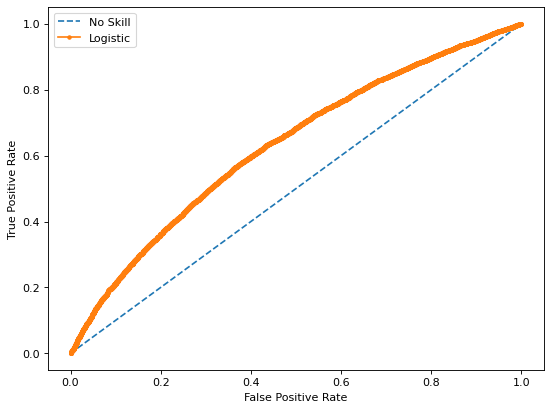

In [31]:
ns_fpr, ns_tpr, _ = roc_curve(y_test_1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_1, lr_probs)

figure(figsize=(8, 6), dpi=80)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [32]:
# The best performing model would have the logistic curve closer to the right angle, 
# with a steeply rising true positive rate at the start and a larger area under the curve
# the current model predicts moderately well